## NLP solver reference
- pyOpt : http://www.pyopt.org/tutorial.html

In [1]:
import pyOpt

[debugging error] cannot import name 'SOLVOPT'
[debugging error] cannot import name 'MMA'
[debugging error] cannot import name 'COBYLA'
[debugging error] cannot import name 'SNOPT'
[debugging error] cannot import name 'NLPQL'
[debugging error] cannot import name 'NLPQLP'
[debugging error] cannot import name 'NSGA2'
[debugging error] cannot import name 'FSQP'
[debugging error] cannot import name 'PSQP'
[debugging error] cannot import name 'MIDACO'
[debugging error] cannot import name 'MMFD'
[debugging error] cannot import name 'FILTERSD'
[debugging error] cannot import name 'SDPEN'
[debugging error] cannot import name 'GCMMA'


In [2]:
import matplotlib.pyplot as plt
import numpy as np

state 및 control을 N개의 piece-wise로 쪼갠다고 가정.
$$
x[0] : t_{f} \\
x[1:N+2] : u_0, u_1, ..., u_N \\
x[N+2:3*N+4] : x_0, \dot{x}_0, x_1, \dot{x}_1, ..., x_N, \dot{x}_N \\
$$

In [3]:
def dynamics(x, u):
    A_mat = np.array([[0, 1], [0, 0]])
    B_mat = np.array([[0], [1]])
    result = np.matmul(A_mat, x) + np.matmul(B_mat, u)
    return result

In [13]:
def objfunc(x):
    N = int((len(x) - 1)/3 - 1)
    t_f = x[0]
    u_list = np.array(x[1:N+2]).reshape((N+1, 1))
    x_list = np.array(x[N+2:]).reshape((N+1, 2))
    dt = t_f/N
    
    # get x_dot from dynamics
    x_dot_list = dynamics(x_list.T, u_list.T).T
    
    # transform variables for pice-wise polynomial
    x_left = x_list[:N,:]
    x_right = x_list[1:,:]
    x_dot_left = x_dot_list[:N,:]
    x_dot_right = x_dot_list[1:,:]
    u_left = u_list[:N,:]
    u_right = u_list[1:,:]
    
    # get collocation points
    x_c = 0.5*(x_left + x_right) + dt*0.125*(x_dot_left - x_dot_right)
    u_c = 0.5*(u_left + u_right)
    x_dot_c = dynamics(x_c.T, u_c.T).T
    
    # objective
    f = t_f

    '''
    # equality constraint
    e_cons = list(np.ravel(x_left - x_right + dt*(x_dot_left + 4*x_dot_c + x_dot_right)/6))
    e_cons += [x_list[0,0], x_list[0,1], x_list[N,0] - 10.0, x_list[N,1]]
    # inequality constraint
    i_cons = []
    # constraint
    g = e_cons + i_cons
    '''
    # equality constraint
    e_cons = np.ravel(x_left - x_right + dt*(x_dot_left + 4*x_dot_c + x_dot_right)/6)
    e_cons2 = np.array([x_list[0,0], x_list[0,1], x_list[N,0] - 10.0, x_list[N,1]])
    g = np.concatenate([e_cons, -e_cons, e_cons2, -e_cons2])

    fail = 0
    return f, g, fail

In [14]:
opt_prob = pyOpt.Optimization('bang bang control', objfunc)

In [15]:
opt_prob.addObj('f')
#opt_prob.addVar('x1','c',lower=0.0,upper=42.0,value=10.0)
#opt_prob.addVar('x2','c',lower=0.0,upper=42.0,value=10.0)
#opt_prob.addVar('x3','c',lower=0.0,upper=42.0,value=10.0)
#opt_prob.addVarGroup('x', 3, 'c', value=[10.0, 10.0, 10.0], lower=[0.0, 0.0, 0.0], upper=[42.0, 42.0, 42.0])
#opt_prob.addVar('x','c',lower=-np.inf,upper=np.inf,value=10.0)
#opt_prob.addVar('x','c',value=10.0)

N = 5
opt_prob.addVar('t_f', 'c', lower=0.0, value=10.0)
opt_prob.addVarGroup('u', (N+1)*1, 'c', value=np.zeros(N+1), lower=-np.ones(N+1), upper=np.ones(N+1))
opt_prob.addVarGroup('x', (N+1)*2, 'c', value=np.ones((N+1)*2))
#opt_prob.addConGroup('g', N+4, 'e')
opt_prob.addConGroup('g', 2*(N+4), 'i')

In [16]:
print(opt_prob)


Optimization Problem -- bang bang control

        Objective Function: objfunc

    Objectives:
        Name        Value        Optimum
	     f               0             0

	Variables (c - continuous, i - integer, d - discrete):
        Name    Type       Value       Lower Bound  Upper Bound
	    t_f       c	     10.000000       0.00e+00     1.00e+21 
	    u_0       c	      0.000000      -1.00e+00     1.00e+00 
	    u_1       c	      0.000000      -1.00e+00     1.00e+00 
	    u_2       c	      0.000000      -1.00e+00     1.00e+00 
	    u_3       c	      0.000000      -1.00e+00     1.00e+00 
	    u_4       c	      0.000000      -1.00e+00     1.00e+00 
	    u_5       c	      0.000000      -1.00e+00     1.00e+00 
	    x_0       c	      1.000000      -1.00e+21     1.00e+21 
	    x_1       c	      1.000000      -1.00e+21     1.00e+21 
	    x_2       c	      1.000000      -1.00e+21     1.00e+21 
	    x_3       c	      1.000000      -1.00e+21     1.00e+21 
	    x_4       c	      1.000000 

In [17]:
solver = pyOpt.SLSQP()
#solver = pyOpt.CONMIN()
#solver = pyOpt.KSOPT()

In [18]:
solver.ListAttributes()



Attributes List of: 'SLSQP' - SLSQP Instance

category : 'Local Optimizer'
informs : {-1: 'Gradient evaluation required (g & a)', 0: 'Optimization terminated successfully.', 1: 'Function evaluation required (f & c)', 2: 'More equality constraints than independent variables', 3: 'More than 3*n iterations in LSQ subproblem', 4: 'Inequality constraints incompatible', 5: 'Singular matrix E in LSQ subproblem', 6: 'Singular matrix C in LSQ subproblem', 7: 'Rank-deficient equality constraint subproblem HFTI', 8: 'Positive directional derivative for linesearch', 9: 'Iteration limit exceeded'}
options : {'defaults': {'ACC': [<class 'float'>, 1e-06], 'MAXIT': [<class 'int'>, 50], 'IPRINT': [<class 'int'>, 1], 'IOUT': [<class 'int'>, 6], 'IFILE': [<class 'str'>, 'SLSQP.out']}, 'ACC': [<class 'float'>, 1e-06], 'MAXIT': [<class 'int'>, 50], 'IPRINT': [<class 'int'>, 1], 'IOUT': [<class 'int'>, 6], 'IFILE': [<class 'str'>, 'SLSQP.out']}
poa : False




In [19]:
#solver.setOption('IPRINT', 1)

In [20]:
fstr, xstr, inform = solver(opt_prob, sens_type='FD')
print(inform)

{'value': 0, 'text': 'Optimization terminated successfully.'}


In [21]:
print(opt_prob.solution(0))


SLSQP Solution to bang bang control

        Objective Function: objfunc

    Solution: 
--------------------------------------------------------------------------------
    Total Time:                    0.0082
    Total Function Evaluations:         0
    Sensitivities:        FD

    Objectives:
        Name        Value        Optimum
	     f    -6.18296e-14             0

	Variables (c - continuous, i - integer, d - discrete):
        Name    Type       Value       Lower Bound  Upper Bound
	    t_f       c	     -0.000000       0.00e+00     1.00e+21 
	    u_0       c	     -0.412133      -1.00e+00     1.00e+00 
	    u_1       c	     -0.466577      -1.00e+00     1.00e+00 
	    u_2       c	     -0.362763      -1.00e+00     1.00e+00 
	    u_3       c	     -0.443314      -1.00e+00     1.00e+00 
	    u_4       c	     -0.365829      -1.00e+00     1.00e+00 
	    u_5       c	      0.362707      -1.00e+00     1.00e+00 
	    x_0       c	      0.715162      -1.00e+21     1.00e+21 
	    x_1   

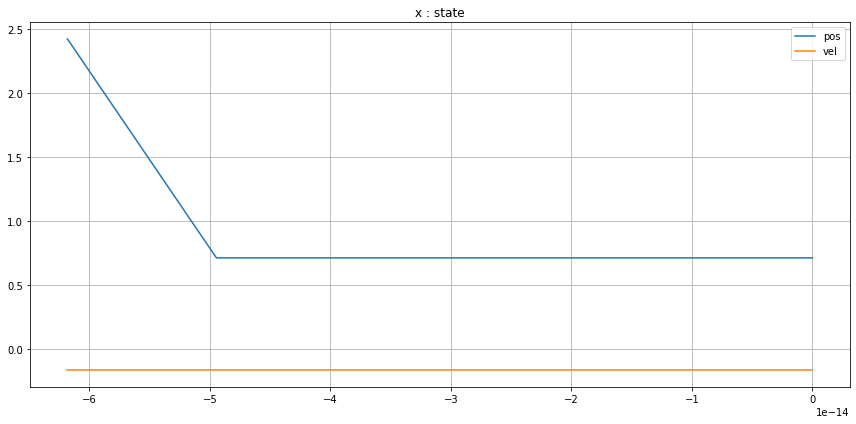

In [22]:
N = int((len(xstr) - 1)/3 - 1)
t_f = xstr[0]
t_list = np.linspace(0, t_f, N+1)
u_list = np.array(xstr[1:N+2]).reshape((N+1, 1))
x_list = np.array(xstr[N+2:]).reshape((N+1, 2))

fig_size = 6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_size*2, fig_size))
ax.plot(t_list, x_list[:,0], label="pos")
ax.plot(t_list, x_list[:,1], label="vel")
#ax.set_ylim(-1, 10)
ax.grid()
ax.legend()
ax.set_title('x : state')

fig.tight_layout()
plt.show()

In [ ]:
#print(opt_prob.solution(0))